# Materialien zu <i>zufall</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Aufgaben 2 - Urnen-Experimente (1)

<br>
<i>Die Aufgaben wurden entnommen aus 

A. Müller<br>
Wahrscheinlichkeitsrechnung und Statistik<br>
Grundkurs<br>
Stark Verlag 1997<br>

Aufgaben 12, 15, 17, 18
<br>

In [1]:
%run zufall/start

### Aufgabe 12
In einer Urne befinden sich vier rote, drei schwarze Kugeln und eine grüne Kugel. Es<br> werden zwei
Kugeln mit Zurücklegen gezogen. Bestimmen Sie die Wahrscheinlichkeit <br>des Ereignisses <br><br>
$A$ = "Mindestens eine rote Kugel wird gezogen"<br>

In [2]:
u1 = Urne( {r:4, s:3, g:1}, 2 )
u1

Urne(Stufen=2, mit Wiederholung , mit Anordnung)

In [3]:
u1.omega

set([gg, gr, gs, rg, rr, rs, sg, sr, ss])

In [4]:
u1.P([ 'gr', 'rg', 'rr', 'rs', 'sr' ])

3/4

oder

In [5]:
u1.P( symbols('gr rg rr rs sr') )    # leichter zu schreiben

3/4

oder mittels einer ZG-Funktion

In [6]:
u2 = Urne( {r:4, s:3, g:1}, 2, f=anzahl(r) )   # anzahl ist vordefiniert; es zählt 
                                               # hier die r in den Elementen der Grundmenge

Erzeugung eines ZufallsGroesse-Objektes


In [7]:
u2.P(X >= 1)

3/4

eventuell auch mit einer eigenen Funktion:

In [5]:
def func(liste):             # func operiert auf einer Liste
    return liste.count(r)    # und zählt, wie oft r in ihr enthalten ist

u3 = Urne({r:4, s:3, g:1}, 2, f=func)

Erzeugung eines ZufallsGroesse-Objektes


In [6]:
u3.P(X > 0)

3/4

### Aufgabe 15
Aus einem Lesekasten sind zehn gleichartige Buchstabenkärtchen in eine Urne gegeben <br>worden. Eines
der Kärtchen trägt den Buchstaben $L$, eines den Buchstaben $S$ und acht <br>den Buchstaben $E$. Aus der Urne
werden zwei Kärtchen ohne Zurücklegen gezogen.
<br><br>
a)  Zeichnen Sie ein Baumdiagramm und bestimmen Sie die Wahrscheinlichkeit der Ereignisse
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$A$ = "Genau einmal wird $S$ gezogen" und <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$B$ = "Höchstens einmal wird $E$ gezogen"<br><br>
b)  Formulieren Sie die Ereignisse $A$ und  $nicht(\;A \cup B \;)$  in der Umgangssprache
<br><br>
c)  Mit welcher Wahrscheinlichkeit ergeben fünf nacheinander ohne Zurücklegen gezogene <br>
&nbsp;&nbsp;&nbsp;&nbsp;Kärtchen das Wort SEELE?<br><br>
<br>

In [10]:
u = Urne( {'L':1, 'S':1, 'E':8}, 2, w=ohne )
u

Urne(Stufen=2, ohne Wiederholung , mit Anordnung)

### zu a)

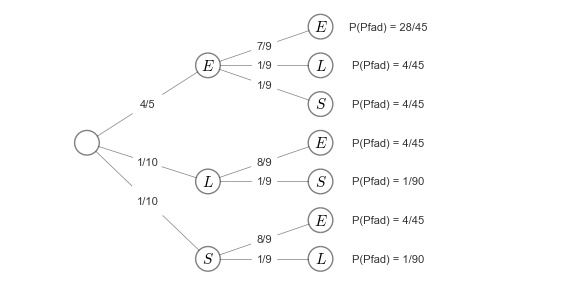

In [11]:
u.baum

In [12]:
ES, LS, SE, SL = symbols('ES LS SE SL')

A = { ES, LS, SE, SL }; A

set([ES, LS, SE, SL])

In [13]:
B = { *symbols('LS LE SL SE EL ES')}; B   # leichter zu schreiben
                                          # * entpackt das Tupel

set([EL, ES, LE, LS, SE, SL])

In [14]:
pA = u.P(A); pB = u.P(B); pA, pB

⎛     17⎞
⎜1/5, ──⎟
⎝     45⎠

### zu b)

In [15]:
u.omega

set([EE, EL, ES, LE, LS, SE, SL])

In [16]:
ea = EA(u.omega)   # Bereitstellung einer Ereignisalgebra zum Rechnen 
                   # mit Ereignissen bezüglich der Urne

ea.berechnen(A, B, 'nicht A') 


set([EE, EL, LE])

Das Ergebnis ist "Es wird kein $S$ gezogen"

In [17]:
ea.berechnen(A, B, 'nicht (A oder B)')   


set([EE])

Das Ergebnis ist "Es wird zweimal $E$ gezogen"

### Zu c)
Das folgende Schema zeigt den Prozess, in den Klammern steht der Inhalt der Urne,<br> unten stehen die
entsprechenden Wahrscheinlichkeiten

$\qquad\qquad \quad\quad\:\:\:S \qquad\quad\:\:\:E \qquad\quad\:\: E \qquad\quad\:\: L \qquad\quad\:\:\,  E$

$[L, S, E] :  [1,1,8] \rightarrow [1,0,8]\rightarrow[1,0,7]\rightarrow[1,0,6]\rightarrow[0,0,6]\rightarrow[0,0,5]$

$\qquad\qquad \quad\quad\:\:\frac{1}{10} \qquad\quad\:\frac{8}{9} \qquad\quad\:\: \frac{7}{8} \qquad\quad\:\: \frac{1}{7} \qquad\quad\:\: 1$
<br><br>

die Multiplikation der Wahrscheinlichkeiten ergibt &nbsp;&nbsp; 
$\frac{1}{10} \cdot \frac{8}{9} \cdot\frac{7}{8} \cdot\frac{1}{7} \cdot 1 = \frac{1}{90}$
<br><br>

### Aufgabe 17
Faschingskrapfen werden manchmal aus Jux mit Senf gefüllt. In einem Korb liegen zehn<br> Krapfen, von 
denen zwei mit Senf ($s$) gefüllt sind, die anderen acht mit Marmelade ($m$).<br>Äußerlich lassen sich die
Krapfen nicht unterscheiden.<br>
Ein Faschingsnarr greift zweimal hintereinander in den Korb und holt jeweils (ohne Zurück-<br>legen)
einen Krapfen heraus.

a)  Zeichnen Sie zu diesem Zufallsexperiment ein Baumdiagramm und bestimmen Sie <br>
&nbsp;&nbsp;&nbsp;&nbsp;daraus die Wahrscheinlichkeit der Ereignisse

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$A$ = "Beide Krapfen sind mit Senf gefüllt"<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$B$ = "Mindestens ein Krapfen ist mit Senf gefüllt"

b)  Formulieren Sie das Ereignis $\overline{A} \cap \overline{B}\,$ in Worten und geben Sie dessen Wahrscheinlichkeit an

c)  Alle Krapfen mögen wieder in obiger Zusammensetzung im Korb liegen. Es werden fünf<br>
&nbsp;&nbsp;&nbsp;&nbsp;Krapfen (ohne Zurücklegen) gezogen. Mit welcher Wahrscheinlichkeit  


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1)  sind der zweite und der fünfte die mit Senf gefüllten Krapfen<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2)  ist nur einer mit Senf gefüllt?

### Zu a)

In [18]:
u = Urne( { s:2, m:8 }, 2, w=nein )

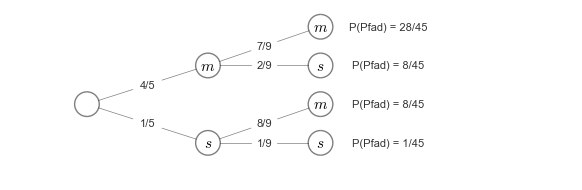

In [19]:
u.baum

In [20]:
ss, sm, ms, mm = symbols('ss sm ms mm')

A = {ss}; B = {sm, ms, ss}; A, B   # die beiden Ereignisse

(set([ss]), set([ms, sm, ss]))

In [21]:
u.P(A), u.P(B)

⎛      17⎞
⎜1/45, ──⎟
⎝      45⎠

oder wieder mit einer Zufallsgröße

In [22]:
u1 = Urne( { s:2, m:8 }, 2, w=nein, f=anzahl(s) )

Erzeugung eines ZufallsGroesse-Objektes


In [23]:
pA = u1.P(2); pB = u1.P(X >= 1); pA, pB

⎛      17⎞
⎜1/45, ──⎟
⎝      45⎠

### Zu b)

In [24]:
u.omega

set([mm, ms, sm, ss])

In [25]:
ea = EA(u.omega)

ea.berechnen(A, B, 'nicht A und nicht B')


set([mm])

Ergebnis ist  "Es wird zweimal ein Krapfen mit Marmelade gezogen"

In [26]:
u.P(mm)

28
──
45

### Zu c)

In [27]:
uc = Urne( { s:2, m:8 }, 5, w=nein )

In [28]:
uc.P('msmms')   # Ergebnis zu (1)

1/45

In [29]:
uc.P(['smmmm', 'msmmm', 'mmsmm', 'mmmsm', 'mmmms'])   # Ergebnis zu (2)

5/9

oder Erhalten des Ergebnisses zu (2) mit einer Zufallsgröße

In [30]:
zg = Urne( { s:2, m:8 }, 5, w=nein, f=anzahl(s) )

zg.P(1)

Erzeugung eines ZufallsGroesse-Objektes


5/9

### Aufgabe 18
In einer Schale liegen 20 Bonbons, acht mit Erdbeer-, acht mit Zitronen- und vier<br>
mit Kirschgeschmack. Da sie mit dem jeweils gleichen Papier eingewickelt sind, kann<br>
man sie nicht unterscheiden. Der Fruchtgeschmack wird dadurch festgestellt, dass <br>
man das Bonbon isst
<br>
<br>
a)  Jemand isst drei Bonbons hintereinander
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(1)  Geben Sie die Ereignisse  $A$: "Jeder Geschmack ist vertreten" und  $B$: "Minde-<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; stens zwei Bonbons sind mit Kirschgeschmack" als Teilmengen von $\Omega\,$ an und 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
berechnen Sie $P(A)$ und $P(B)$ 
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(2) Formulieren Sie das Ereignis $\overline{B}\,$ in Worten und berechnen Sie $P(\overline{B})\,$

b)  Jemand isst fünf Bonbons so, dass er jeweils, wenn er ein Bonbon aus der Schale <br>
&nbsp;&nbsp;&nbsp;&nbsp;nimmt, eines mit Kirschgeschmack in die Schale gibt.
<br>
&nbsp;&nbsp;&nbsp;&nbsp;Berechnen Sie die Wahrscheinlichkeit des Elementarereignisses $\,C = \{ ZEKKE \}$
<br>

### Zu a)

In [31]:
E = Symbol('E')
E, K, Z   # 3 Symbole

(E, K, Z)

In [32]:
u = Urne( { E:8, Z:8, K:4 }, 3, w=ohne )

In [33]:
u.omega

set([EEE, EEK, EEZ, EKE, EKK, EKZ, EZE, EZK, EZZ, KEE, KEK, KEZ, KKE, KKK, KKZ
, KZE, KZK, KZZ, ZEE, ZEK, ZEZ, ZKE, ZKK, ZKZ, ZZE, ZZK, ZZZ])

In [34]:
A = { *symbols('EZK, EKZ, ZEK, ZKE, KEZ, KZE') }; A   # * packt die Elemente des Tupels aus

set([EKZ, EZK, KEZ, KZE, ZEK, ZKE])

In [35]:
B = { *symbols('KKE, KKZ, KEK, KZK, EKK, ZKK, KKK') }; B

set([EKK, KEK, KKE, KKK, KKZ, KZK, ZKK])

In [36]:
u.P(A), u.P(A, d=4)   # Ergebnis zu (1)

⎛ 64        ⎞
⎜───, 0.2246⎟
⎝285        ⎠

In [37]:
u.P(B), u.P(B, d=4)   # ebenso

(5/57, 0.0877)

$\overline{B}$ = "Höchstens ein Bonbon ist mit Kirschgeschmack"

In [38]:
ea = EA(u.omega)
nichtB = ea.berechnen(A, B, 'nicht B')

nichtB

set([EEE, EEK, EEZ, EKE, EKZ, EZE, EZK, EZZ, KEE, KEZ, KZE, KZZ, ZEE, ZEK, ZEZ
, ZKE, ZKZ, ZZE, ZZK, ZZZ])

In [39]:
u.P(nichtB), 1 - u.P(B)   # Ergebnis zu (2)

⎛52  52⎞
⎜──, ──⎟
⎝57  57⎠

### Zu b)
Das folgende Schema zeigt den Prozess, in den Klammern steht der Inhalt der Urne,<br>
unten stehen die entsprechenden Wahrscheinlichkeiten

$\qquad\qquad \quad\quad\:\:\:Z \qquad\quad\:\:\:E \qquad\quad\:\: K \qquad\quad\: K \qquad\quad\,  E$

$[E, Z, K] :  [8,8,4] \rightarrow [8,7,5]\rightarrow[7,7,6]\rightarrow[7,7,6]\rightarrow[7,7,6]\rightarrow[6,7,6]$

$\qquad\qquad \quad\quad\:\:\,\frac{8}{20} \qquad\quad\,\frac{8}{20} \qquad\quad \frac{6}{20} \qquad\quad \frac{6}{20} \qquad\quad\,\frac{7}{20}$
<br><br>
die Multiplikation der Wahrscheinlichkeiten ergibt &nbsp;&nbsp; 
$\frac{8}{20} \cdot \frac{8}{20} \cdot\frac{6}{20} \cdot\frac{6}{20} \cdot \frac{7}{20} = \frac{63}{12500} = 0.00504$
<br><br>